# **TP2 - Ciencia de Datos**

### **Ejercicio 1 - Análisis Exploratorio**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import TreebankWordTokenizer
import string

# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('punkt')

# Leer el dataset
df = pd.read_csv('C:/Users/tiefa/Desktop/TP2 - CD/tweets_hate_speech.csv')

# Verificar columnas
print(df.columns)

#Verificar si hay valores nulos
print(df.isnull().sum())

Index(['tweet', 'label'], dtype='object')
tweet    0
label    0
dtype: int64


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tiefa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tiefa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
print(df.head())

                                               tweet      label
0  !!! RT @mayasolovely: As a woman you shouldn't...    neither
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  offensive
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  offensive
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  offensive
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  offensive


In [4]:
# Asegurarse de que las columnas sean correctas
df = df[['tweet', 'label']].dropna()

# Eliminar stopwords en inglés
stop_words = set(stopwords.words('english'))

In [8]:
# Función para limpiar texto
tokenizer = TreebankWordTokenizer()

def clean_text(text):
    tokens = tokenizer.tokenize(text.lower())
    words = [w for w in tokens if w.isalpha() and w not in stop_words]
    return words

# Agregar columna con longitud del tweet (en palabras)
df['clean_tokens'] = df['tweet'].apply(clean_text)
df['length'] = df['clean_tokens'].apply(len)

In [9]:
print(df.head())

                                               tweet      label  \
0  !!! RT @mayasolovely: As a woman you shouldn't...    neither   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  offensive   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  offensive   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  offensive   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  offensive   

                                        clean_tokens  length  
0  [rt, mayasolovely, woman, complain, cleaning, ...      10  
1  [rt, boy, dats, cold, tyga, dwn, bad, cuffin, ...      11  
2  [rt, urkindofbrand, dawg, rt, ever, fuck, bitc...      11  
3                           [rt, look, like, tranny]       4  
4  [rt, shenikaroberts, shit, hear, might, true, ...      11  


C:\Users\tiefa\AppData\Local\Temp\ipykernel_14380\1096132063.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


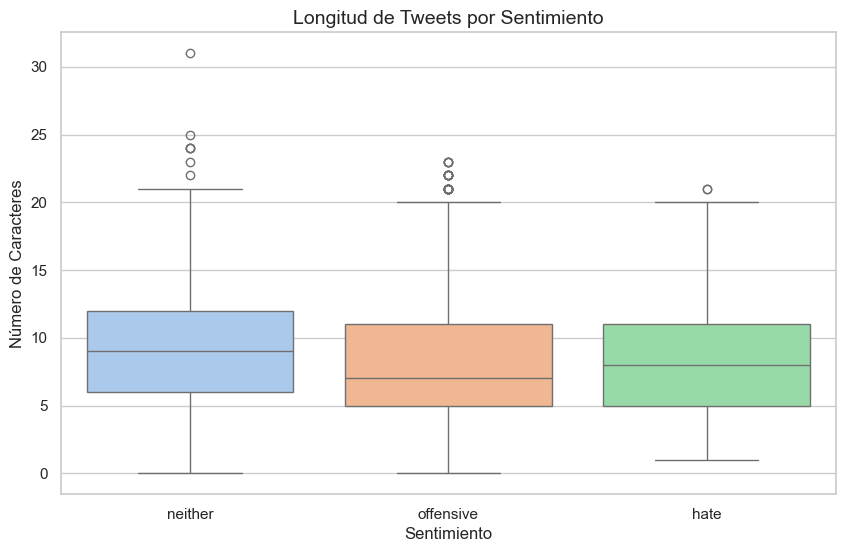

In [11]:
# Estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, 
            x='label', 
            y='length', 
            palette='pastel')  # hue es opcional si ya se separa por x

# Títulos y etiquetas
plt.title("Longitud de Tweets por Sentimiento", fontsize=14)
plt.xlabel("Sentimiento", fontsize=12)
plt.ylabel("Número de Caracteres", fontsize=12)
plt.legend().set_visible(False)  # ocultar leyenda duplicada

plt.show()

C:\Users\tiefa\AppData\Local\Temp\ipykernel_14380\3818576007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='length', data=length_avg, palette='viridis')


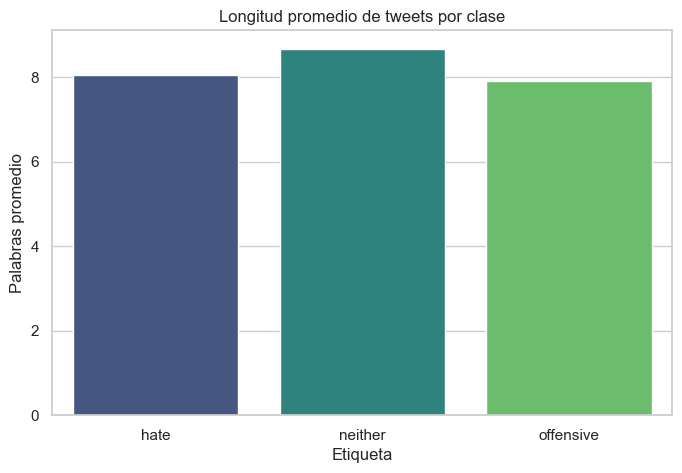

In [12]:
# Longitud promedio de tweets por clase
length_avg = df.groupby('label')['length'].mean().reset_index()

# Visualizar la longitud promedio de tweets por clase
plt.figure(figsize=(8, 5))
sns.barplot(x='label', y='length', data=length_avg, palette='viridis')
plt.title('Longitud promedio de tweets por clase')
plt.ylabel('Palabras promedio')
plt.xlabel('Etiqueta')
plt.show()

C:\Users\tiefa\AppData\Local\Temp\ipykernel_14380\563692759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='mako')


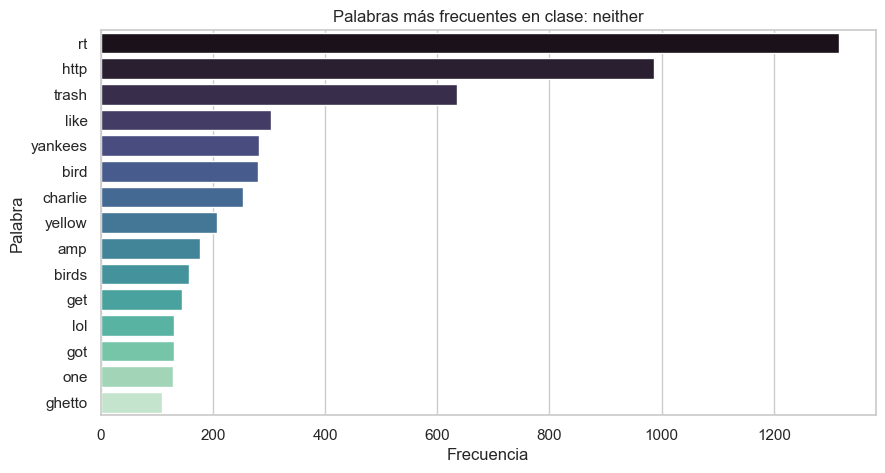

C:\Users\tiefa\AppData\Local\Temp\ipykernel_14380\563692759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='mako')


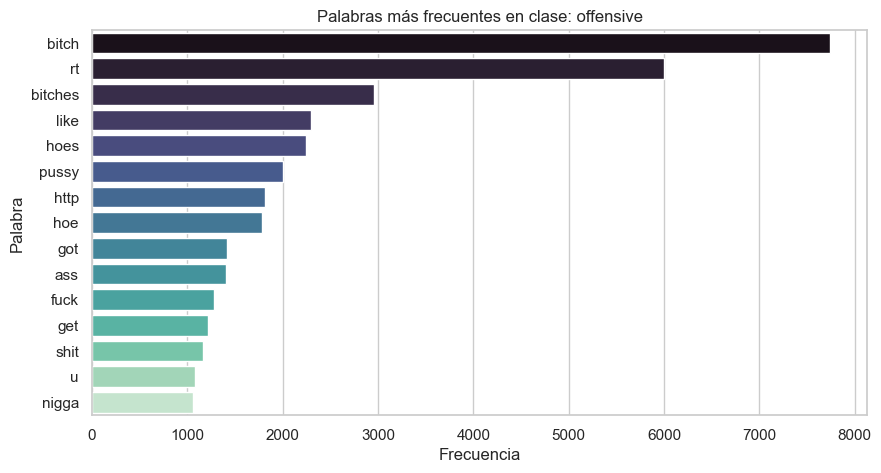

C:\Users\tiefa\AppData\Local\Temp\ipykernel_14380\563692759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='mako')


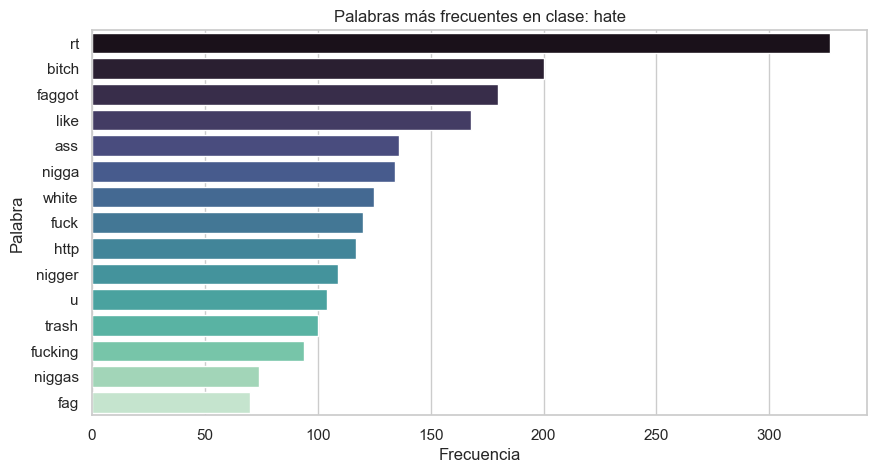

In [13]:
# Función para mostrar las n palabras más frecuentes por clase
def plot_top_words(label, n=15):
    subset = df[df['label'] == label]
    all_words = [word for tokens in subset['clean_tokens'] for word in tokens]
    most_common = Counter(all_words).most_common(n)
    words, freqs = zip(*most_common)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(freqs), y=list(words), palette='mako')
    plt.title(f'Palabras más frecuentes en clase: {label}')
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.show()

# Graficar palabras más comunes por clase
for label in df['label'].unique():
    plot_top_words(label)

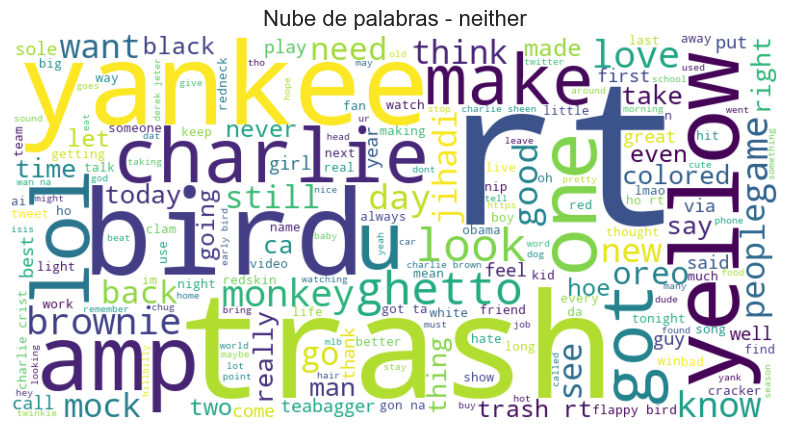

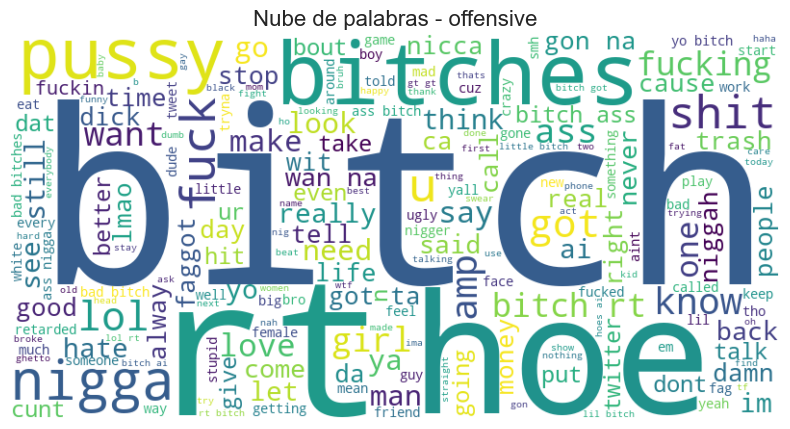

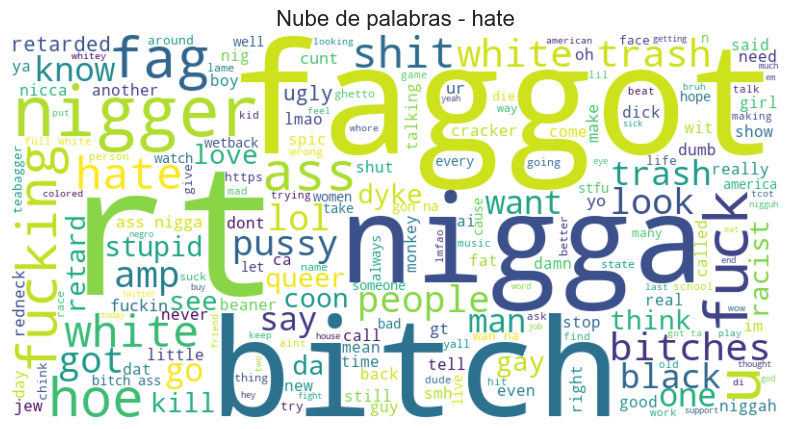

In [14]:
# WordCloud por clase
def generate_wordcloud(label):
    subset = df[df['label'] == label]
    all_words = " ".join([" ".join(tokens) for tokens in subset['clean_tokens']])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Nube de palabras - {label}', fontsize=16)
    plt.axis('off')
    plt.show()

for label in df['label'].unique():
    generate_wordcloud(label)

### **Ejercicio 2 - Procesamiento del conjunto de datos**

In [15]:
from sklearn.preprocessing import LabelEncoder

# Codificar la columna de clase a números
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])  # Guarda el target como número

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convierte la lista de tokens a texto separado por espacios
df['clean_text'] = df['clean_tokens'].apply(lambda tokens: ' '.join(tokens))

# Aplica TF-IDF sobre el texto limpio
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

# La variable de salida ya está como 'label'
y = df['label']

In [17]:
from imblearn.over_sampling import SMOTE

# Balancear el dataset usando SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [18]:
from imblearn.under_sampling import RandomUnderSampler

# Balanceo con undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Verificamos
print("Distribución balanceada:")
print(pd.Series(y_resampled).value_counts())

Distribución balanceada:
label
0    1430
1    1430
2    1430
Name: count, dtype: int64


##### **Verificación del conjunto de datos**

In [20]:
# Comparar tokens con texto limpio para verificar limpieza
print(df[['clean_tokens', 'clean_text']].head())

                                        clean_tokens  \
0  [rt, mayasolovely, woman, complain, cleaning, ...   
1  [rt, boy, dats, cold, tyga, dwn, bad, cuffin, ...   
2  [rt, urkindofbrand, dawg, rt, ever, fuck, bitc...   
3                           [rt, look, like, tranny]   
4  [rt, shenikaroberts, shit, hear, might, true, ...   

                                          clean_text  
0  rt mayasolovely woman complain cleaning amp ma...  
1  rt boy dats cold tyga dwn bad cuffin dat hoe p...  
2  rt urkindofbrand dawg rt ever fuck bitch start...  
3                                rt look like tranny  
4  rt shenikaroberts shit hear might true might f...  


In [21]:
#Verificar el tipo y forma de la matriz resultante
print(type(X_resampled))  # Debería ser <class 'scipy.sparse._csr.csr_matrix'>
print(X_resampled.shape)  # Cantidad de muestras y features (e.g., (10000, 5000))

<class 'scipy.sparse._csr.csr_matrix'>
(4290, 5000)


In [22]:
# Chequeo de la distribución de clases después del undersampling
print(y_resampled.value_counts())
print(y_resampled.head())

label
0    1430
1    1430
2    1430
Name: count, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32


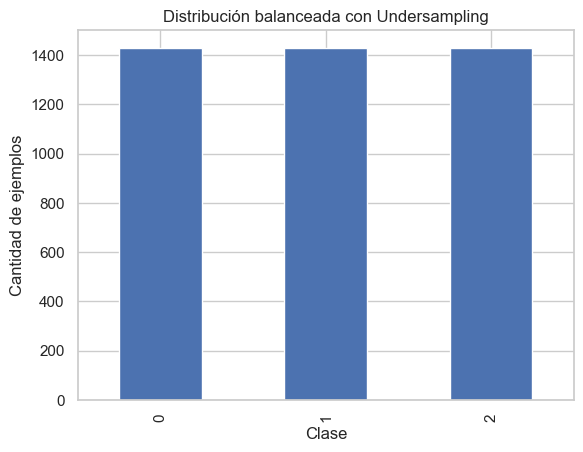

In [23]:
pd.Series(y_resampled).value_counts().sort_index().plot(kind='bar')

plt.title('Distribución balanceada con Undersampling')
plt.xlabel('Clase')
plt.ylabel('Cantidad de ejemplos')
plt.show()

In [24]:
# Verificacion de formas original y balanceado
print("Tamaño original:", X.shape, y.shape)
print("Tamaño tras balanceo:", X_resampled.shape, y_resampled.shape)

Tamaño original: (24783, 5000) (24783,)
Tamaño tras balanceo: (4290, 5000) (4290,)


In [26]:
import numpy as np

empty_rows = (X_resampled.toarray().sum(axis=1) == 0)
print("Filas completamente vacías:", np.sum(empty_rows))

Filas completamente vacías: 15


In [27]:
# Identificar índices no vacíos
non_empty_mask = (X_resampled.toarray().sum(axis=1) != 0)

# Aplicar la máscara para filtrar X e y
X_resampled = X_resampled[non_empty_mask]
y_resampled = y_resampled[non_empty_mask]

In [28]:
print("Filas vacías luego de limpieza:", (X_resampled.toarray().sum(axis=1) == 0).sum())

Filas vacías luego de limpieza: 0


### **Ejercicio 3 - Modelado**

In [41]:
from sklearn.model_selection import train_test_split

# Dividir el dataset balanceado en train, validación y test

# Primero: separar en train y test (por ejemplo, 80% y 20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Segundo: separar el 80% restante en train y validación (por ejemplo, 75% train, 25% validación)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# Verificación de tamaños:
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (2565, 5000), Validation: (855, 5000), Test: (855, 5000)


Regresión Logística
Mejores parámetros: {'C': 1, 'max_iter': 100}
Accuracy: 0.7812865497076024
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       285
           1       0.79      0.91      0.85       285
           2       0.78      0.75      0.77       285

    accuracy                           0.78       855
   macro avg       0.78      0.78      0.78       855
weighted avg       0.78      0.78      0.78       855



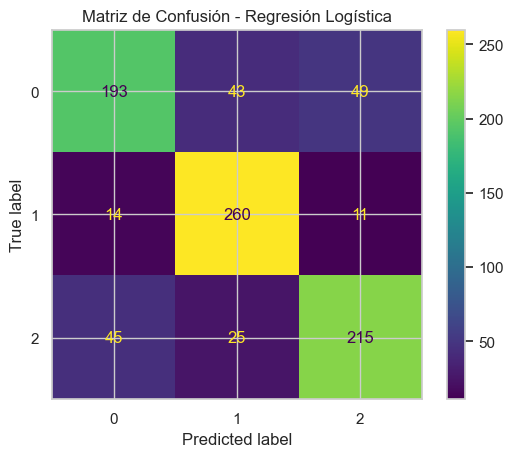

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# ----------------------
# 1. Modelo: Regresión Logística
# ----------------------
print("Regresión Logística")
log_params = {'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200]}
log_model = GridSearchCV(LogisticRegression(), log_params, cv=5)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
print("Mejores parámetros:", log_model.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log), display_labels=log_model.classes_).plot()
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


Naive Bayes (MultinomialNB)
Accuracy: 0.743859649122807
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       285
           1       0.89      0.78      0.83       285
           2       0.69      0.78      0.73       285

    accuracy                           0.74       855
   macro avg       0.75      0.74      0.75       855
weighted avg       0.75      0.74      0.75       855



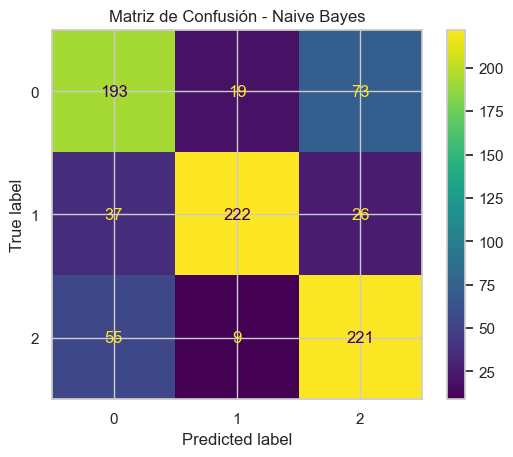

In [43]:
# ----------------------
# 2. Modelo: Naive Bayes
# ----------------------
print("\nNaive Bayes (MultinomialNB)")
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb), display_labels=nb_model.classes_).plot()
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()


Random Forest
Mejores parámetros: {'max_depth': None, 'n_estimators': 100}
Accuracy: 0.7824561403508772
              precision    recall  f1-score   support

           0       0.80      0.64      0.71       285
           1       0.77      0.92      0.84       285
           2       0.78      0.79      0.79       285

    accuracy                           0.78       855
   macro avg       0.78      0.78      0.78       855
weighted avg       0.78      0.78      0.78       855



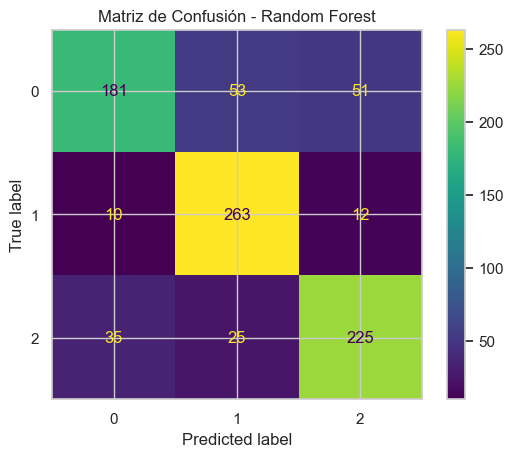

In [44]:
# ----------------------
# 3. Modelo: Random Forest
# ----------------------
print("\nRandom Forest")
rf_params = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Mejores parámetros:", rf_model.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=rf_model.classes_).plot()
plt.title("Matriz de Confusión - Random Forest")
plt.show()